In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [4]:
data = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]
data

,SALES,QUANTITYORDERED,PRICEEACH
0,2871.00,30,95.70
1,2765.90,34,81.35
2,3884.34,41,94.74
3,3746.70,45,83.26
4,5205.27,49,100.00
...,...,...,...
2818,2244.40,20,100.00
2819,3978.51,29,100.00
2820,5417.57,43,100.00
2821,2116.16,34,62.24


In [5]:
data.isnull().sum()

SALES              0
QUANTITYORDERED    0
PRICEEACH          0
dtype: int64

In [6]:
# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

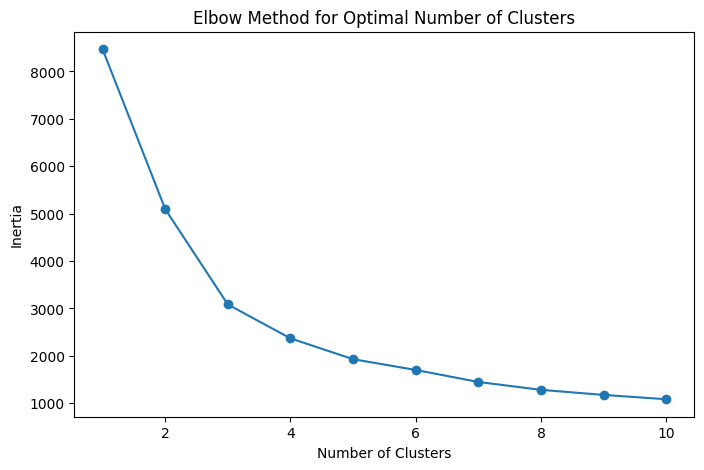

In [7]:
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()
    

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0)
data.loc[:, 'Cluster'] = kmeans.fit_predict(data_scaled)
data

,SALES,QUANTITYORDERED,PRICEEACH,Cluster
0,2871.00,30,95.70,1
1,2765.90,34,81.35,1
2,3884.34,41,94.74,2
3,3746.70,45,83.26,2
4,5205.27,49,100.00,2
...,...,...,...,...
2818,2244.40,20,100.00,1
2819,3978.51,29,100.00,1
2820,5417.57,43,100.00,2
2821,2116.16,34,62.24,0


In [12]:
##Ass done 
# Do some extra for explaining something 

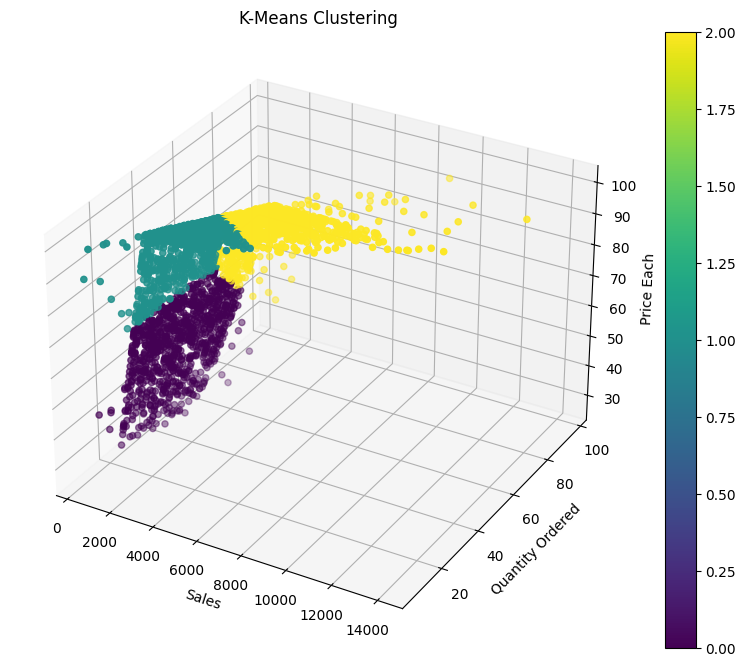

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['SALES'], data['QUANTITYORDERED'], data['PRICEEACH'], c=data['Cluster'], cmap='viridis')
ax.set_xlabel('Sales')
ax.set_ylabel('Quantity Ordered')
ax.set_zlabel('Price Each')
plt.title('K-Means Clustering')
plt.colorbar(scatter)
plt.show()
